In [1]:
import numpy as np
from tensorflow.keras import datasets, utils, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Model

In [7]:
input_layer = layers.Input((32, 32, 3))
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding="same")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters = 65, kernel_size = 3, strides = 2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)
output_layer = layers.Dense(10, activation="softmax")(x)
model = models.Model(input_layer, output_layer)

<p>For the number of parameters we can get from the following
<p> The number of parameters in a Conv2D layer is the (3 * 3 * 3 + 1) * 32 where first 2 threes come from the kernel size and the thord three comes from the number of channels as in image there are three chanels RGB and the 32 comes from the number of filters used.
<p> For the second convulation we multiply the number of filters in thre previous Conv2D layer which is 32 
<p> For the dense layer 128 * (4160+1)
<p>There are 4 parameters for batch normalization moving mean, moving variance, Gamma(scaling) and beta(shift) for each of them there are parameters in a layer so we multiply the filter size by 4 to get the parameters.

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                             

In [9]:
from tensorflow.keras import optimizers

In [10]:
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss="categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs= 20, batch_size=64, shuffle=True)

Epoch 1/20
782/782 [==============================] - 12s 9ms/step - loss: 1.6094 - accuracy: 0.4363
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2068 - accuracy: 0.5726
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0421 - accuracy: 0.6334
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.9392 - accuracy: 0.6695
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.8754 - accuracy: 0.6916
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.8213 - accuracy: 0.7114
Epoch 7/20
782/782 [==============================] - 7s 10ms/step - loss: 0.7766 - accuracy: 0.7282
Epoch 8/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7421 - accuracy: 0.7393
Epoch 9/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7046 - accuracy: 0.7523
Epoch 10/20
782/782 [==============================] - 8s 10ms/step - loss: 0.6789 - accuracy: 

In [12]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 29ms/step - loss: 0.9930 - accuracy: 0.7000


[0.9930483102798462, 0.699999988079071]

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'house', 'ship', 'truck'])
preds = model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


In [14]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

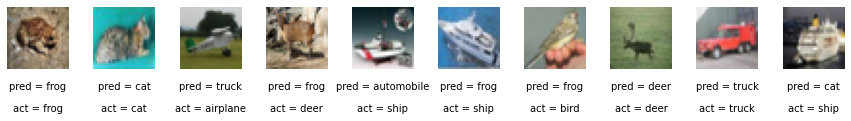

In [15]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)


fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=1, wspace=0.4)


for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize= 10, ha="center", transform = ax.transAxes)
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize= 10, ha="center", transform = ax.transAxes)
    ax.imshow(img)